In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:\dataset\HR_retention.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.shape

(14999, 10)

In [4]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
import matplotlib.pyplot as plt


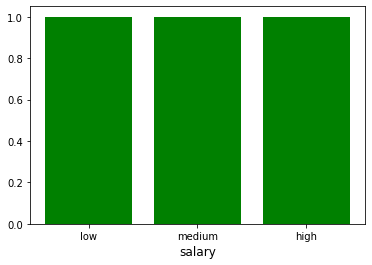

In [6]:
plt.xlabel('salary',fontsize=12)
plt.bar(data['salary'], data['left'], color='g')
plt.show()

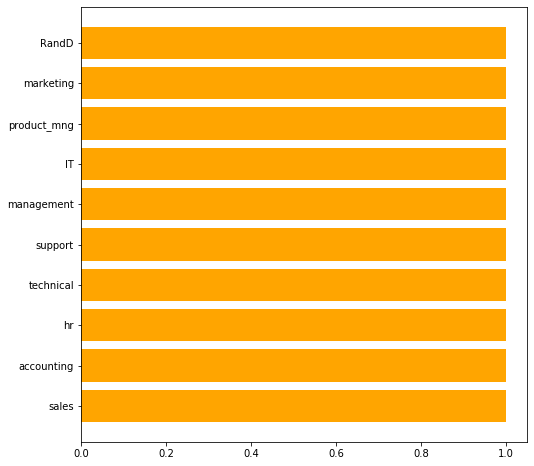

In [7]:
plt.figure(figsize=(8,8))
plt.barh(data['Department'], data['left'], color='orange')
plt.show()

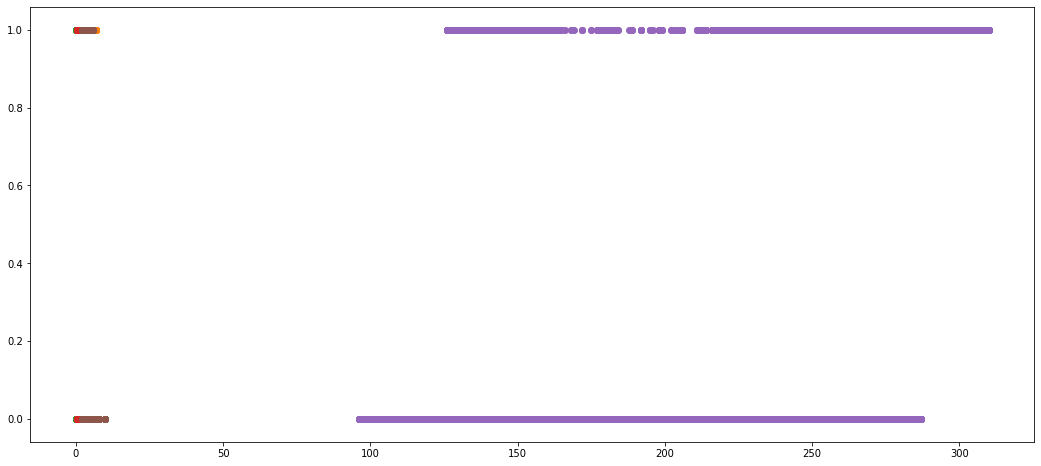

In [8]:
plt.figure(figsize=(18,8))
plt.scatter(data['satisfaction_level'], data['left'])
plt.scatter(data['number_project'], data['left'])
plt.scatter(data['promotion_last_5years'], data['left'])
plt.scatter(data['last_evaluation'], data['left'])
plt.scatter(data['average_montly_hours'], data['left'])
plt.scatter(data['time_spend_company'], data['left'])

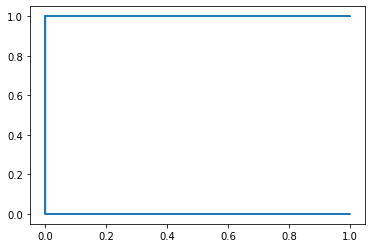

In [9]:

plt.plot(data['promotion_last_5years'], data['left'])


In [10]:
data= data.drop(['promotion_last_5years','Work_accident'], axis='columns')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Department,salary
0,0.38,0.53,2,157,3,1,sales,low
1,0.80,0.86,5,262,6,1,sales,medium
2,0.11,0.88,7,272,4,1,sales,medium
3,0.72,0.87,5,223,5,1,sales,low
4,0.37,0.52,2,159,3,1,sales,low


In [11]:
dummies1 = pd.get_dummies(data['Department'])
dummies1.drop(['technical'],axis='columns')
dummies1.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [12]:
dummies2 = pd.get_dummies(data['salary'])
dummies2.drop(['low'], axis='columns')
dummies2.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [13]:
final_1 = pd.concat([data,dummies1,dummies2], axis='columns')
final = final_1.drop(['Department','salary'], axis='columns')
final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
X=final.drop(['left'],axis='columns')
y=final['left']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
5543,0.77,0.83,3,204,3,0,0,0,0,0,0,0,0,1,0,0,1,0
13054,0.95,0.62,4,150,2,0,0,0,0,1,0,0,0,0,0,0,1,0
6679,0.72,0.61,5,170,3,0,0,0,0,0,0,0,0,0,1,0,0,1
384,0.36,0.48,2,156,3,0,0,1,0,0,0,0,0,0,0,1,0,0
8161,0.50,0.46,3,165,3,0,1,0,0,0,0,0,0,0,0,0,1,0


In [20]:
m=model.predict(X_test)
m[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [21]:
model.score(X_test,y_test)

0.7706666666666667

In [22]:
model.predict_proba(X_test)

array([[0.81529154, 0.18470846],
       [0.97586294, 0.02413706],
       [0.93750697, 0.06249303],
       ...,
       [0.85335264, 0.14664736],
       [0.93845852, 0.06154148],
       [0.30801093, 0.69198907]])